# Bike Sharing Demand Regression Analysis for Boom Bikes

## Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.



## Business Objective

We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

## Solution Approach

The following approach was used for this Regression Analysis  

1. Loading and Understanding Data
2. Data Cleaning
3. Exploratory Data Analysis (EDA)
4. Data Pre-Processing
5. Model Building and Evaluation (RFE + OLS)
6. Best Model Residual Analysis
7. Best Model Metrics
8. Conclusion

## Importing Dependancies

In [1]:
# Importing Necessary Libraries

import warnings
warnings.filterwarnings('ignore')

# Imports for Data Analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('tableau-colorblind10')
%matplotlib inline

# Imports for Regression Model Analysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from prettytable import PrettyTable


## Load and Understand Data

### Data Dictionary 

day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered (target column)
	

In [2]:
# Read the data from the csv file and print data sample
data_df = pd.read_csv('day.csv')
data_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
data_df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [4]:
# Understanding Data Size
data_df.shape

(730, 16)

In [5]:
# Get basic information about the data
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Check for duplicate rows
data_df.duplicated().sum()

0

**Observation(s):**

1.  Input Data contains 730 rows and 6 columns
2. Data contains 0 duplicate rows
3. Data contains 0 null values
4. Data contains date and numeric values but we need to convert some variables into categorical like season, weathersit etc.
5. Data also contains additional non informative columns like instant, casual, registered which can be dropped 

## Data Cleaning

Based on the metadata provided we can drop and change data types of some columns, also we can add mapping to some column values to make them more intuitive.

### Dropping Columns

In [7]:
# Dropping non informative columns instant, casual, registered
cols_to_drop = ['instant', 'casual', 'registered']
data_df = data_df.drop(labels=cols_to_drop, axis=1)
data_df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [8]:
# We can also drop date column dteday since all necessary information like year, month, day etc are already extracted from the date column in input data
data_df = data_df.drop(labels='dteday', axis=1)
data_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

### Mapping Column Values

Mapping `season` column

In [9]:
 # Get unique values for season col
data_df['season'].unique()

array([1, 2, 3, 4], dtype=int64)

In [10]:
# Mapping seasons
map_dict = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
data_df['season'] = data_df['season'].map(map_dict)
data_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


Mapping `mnth` column

In [11]:
# Get unique values for mnth col
data_df['mnth'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [12]:
# Mapping mnth
map_dict = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'June', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
data_df['mnth'] = data_df['mnth'].map(map_dict)
data_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


Mapping `weekday` column

In [13]:
# Get unique values for weekday col
data_df['weekday'].unique()

array([6, 0, 1, 2, 3, 4, 5], dtype=int64)

In [14]:
# Mapping weekday
# On 1-1-2018 it was Monday and here in data its value is 6
# Hence we can create mapping as follows 
# map_dict = {6:'Mon', 0:'Tue', 1:'Wed', 2:'Thu', 3:'Fri', 4:'Sat', 5:'Sun'} #(old mapping)
map_dict = {1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat', 0:'Sun'} #(new mapping)
data_df['weekday'] = data_df['weekday'].map(map_dict)
data_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,1,9.305237,11.46350,43.6957,12.522300,1600


Mapping `weathersit` column

In [15]:
# Get unique values for weathersit col
data_df['weathersit'].unique()

array([2, 1, 3], dtype=int64)

In [16]:
# Mapping weathersit
# MetaData shows 4 values for weathersit but data has only 3, looks like company doesnt have data under heavy weather situation
# Hence we can create mapping for weather situation as follows
map_dict = {1:'Clear/Few Clouds', 2:'Misty', 3:'Light Rain/Snow', 4:'Heavy Rain/Snow'}
data_df['weathersit'] = data_df['weathersit'].map(map_dict)
data_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear/Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear/Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear/Few Clouds,9.305237,11.46350,43.6957,12.522300,1600


Chnaging dtypes to categorical

In [17]:
# Columns yr, holiday, workingday have two values 0 and 1
# Hence we can keep them as it is and just change its dtype to categorical
to_categ_cols = ['yr', 'holiday', 'workingday']
for col in to_categ_cols:
    data_df[col] = data_df[col].astype('category', copy=False)

data_df.dtypes

season          object
yr            category
mnth            object
holiday       category
weekday         object
workingday    category
weathersit      object
temp           float64
atemp          float64
hum            float64
windspeed      float64
cnt              int64
dtype: object

In [18]:
# Get glimpse of cleaned data
data_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear/Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear/Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear/Few Clouds,9.305237,11.46350,43.6957,12.522300,1600


## EDA

### EDA  on Numerical Data Columns

In [19]:
# Separating numerical data and target column
num_data_cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
numeric_data = data_df[num_data_cols]
numeric_data.describe()

,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,4508.006849
std,7.506729,8.150308,14.237589,5.195841,1936.011647
min,2.424346,3.953480,0.000000,1.500244,22.000000
25%,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,5966.000000
max,35.328347,42.044800,97.250000,34.000021,8714.000000


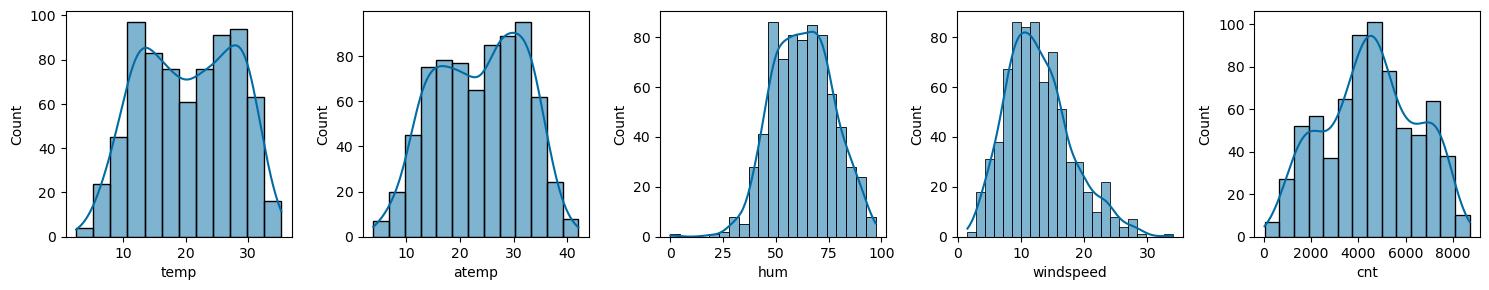

In [20]:
# Plotting Data Distribution for each column
plt.figure(figsize = (15, 3))

fignum = 0
for col in num_data_cols:
    fignum = fignum + 1
    plt.subplot(1, len(num_data_cols), fignum)
    sns.histplot(data = numeric_data, x = col, kde=True)


plt.tight_layout()
plt.show()

**Observation(s):**

1. Distributions for temp and atemp look almost similar
2. cnt shows almost symmetric distribution centered around 4500
3. hum shows left tailed distribution
4. windspeed shows right tailed normal distribution

<Figure size 1000x1000 with 0 Axes>

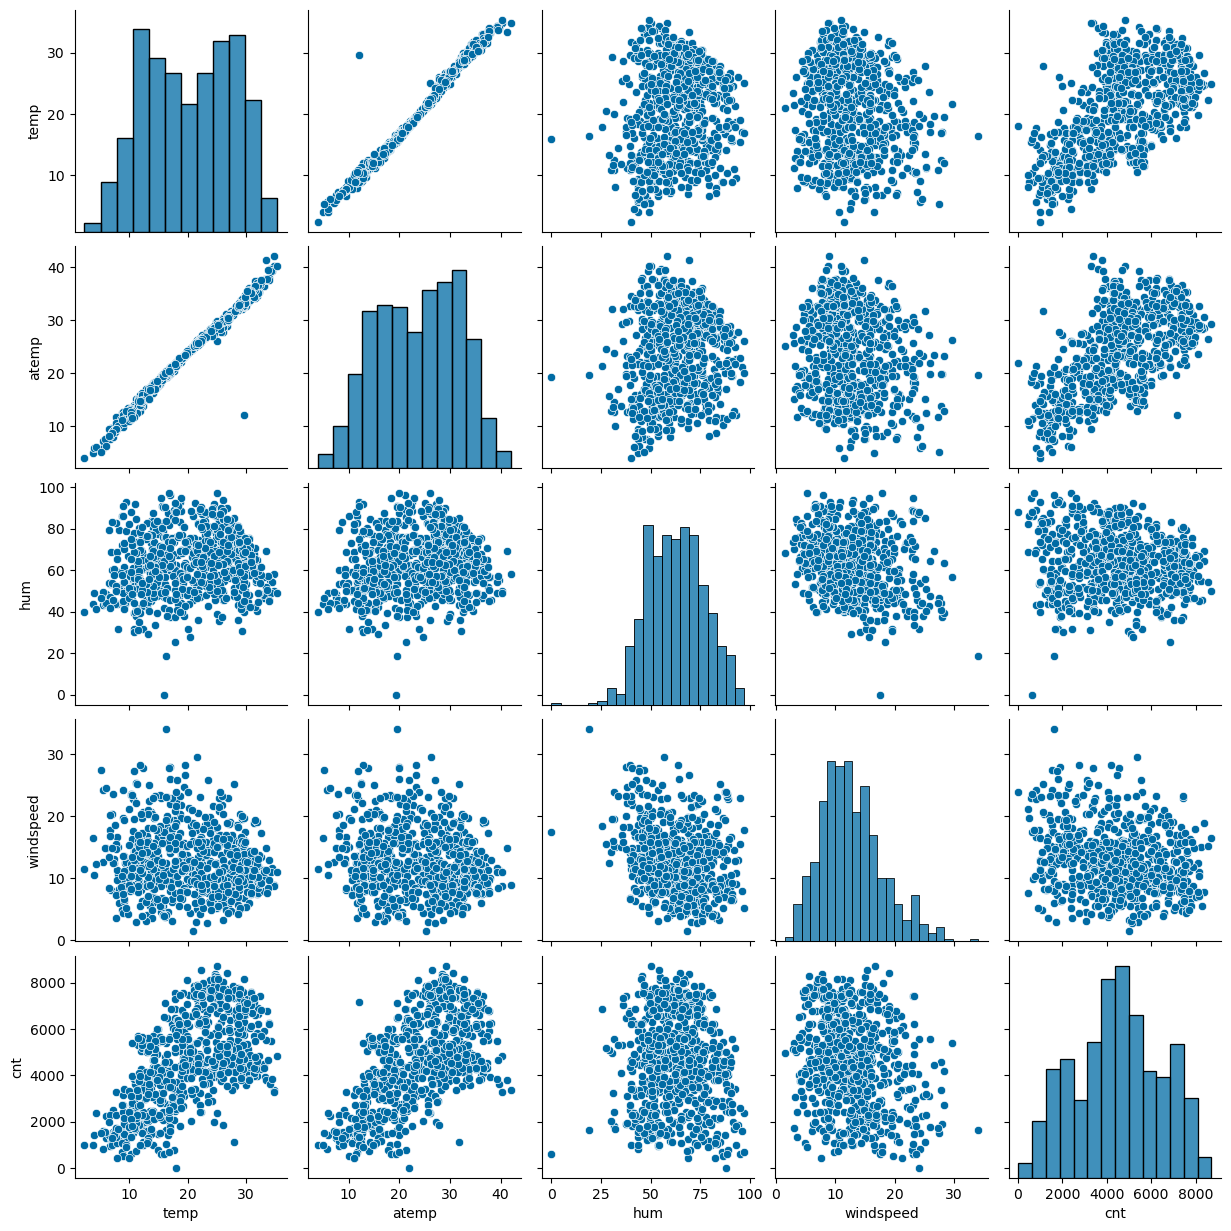

In [21]:
# plotting pairplots
plt.figure(figsize=(10,10))
sns.pairplot(numeric_data)

**Observation(s):**

1. temp and atemp show strong positive correlation, it can be confirmed in correlation heatmap
2. demand(cnt) shows increasing trend with temperature 
3. demand(cnt) shows increasing trend with actual temperature (atemp)
4. demand(cnt) does not show any strong relationship with hum and windspeed

Text(0.5, 1.0, 'Correlation Heatmap')

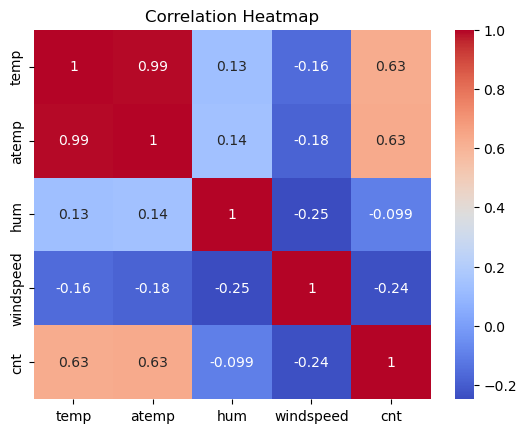

In [22]:
# Plotting Correlation heatmap
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")

**Observation(s):**

1. atemp and temp are highly correlated
2. temp and atemp show same correlation with cnt
3. windspeed and cnt also show a positive correlation

### EDA on non-Numerical Data Columns

In [23]:
# Separating non numerical data and target column
non_num_data_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'cnt']
non_numeric_data = data_df[non_num_data_cols]
non_numeric_data.describe(exclude='int64')

,season,yr,mnth,holiday,weekday,workingday,weathersit
count,730,730,730,730,730,730,730
unique,4,2,12,2,7,2,3
top,fall,0,Jan,0,Sat,1,Clear/Few Clouds
freq,188,365,62,709,105,499,463


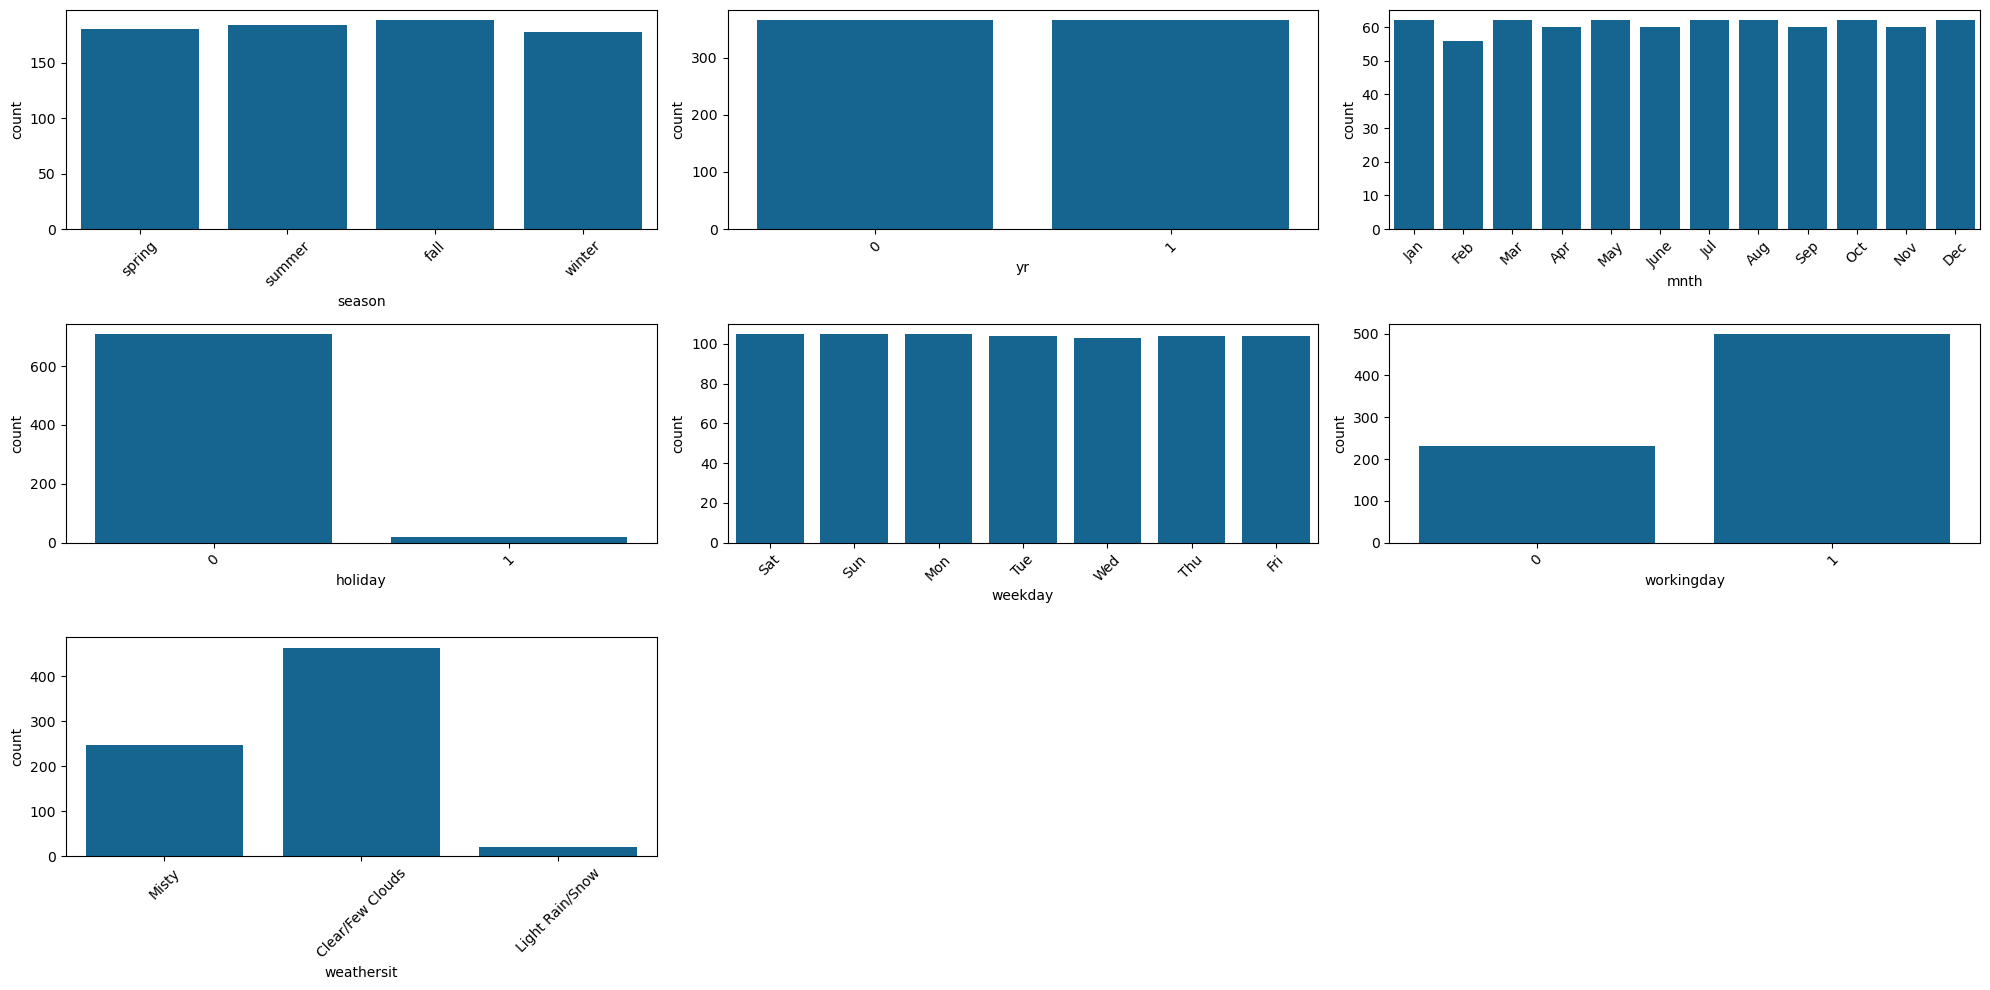

In [24]:
# Plotting Data Distribution for each column
plt.figure(figsize = (20, 10))

fignum = 0
for col in non_num_data_cols[0:-1]:
    fignum = fignum + 1
    plt.subplot(3, 3, fignum)
    sns.countplot(data = non_numeric_data, x = col)
    plt.xticks(rotation = 45)


plt.tight_layout()
plt.show()

**Observation(s):**

1. holiday, workingday and weathersit show unbalanced distribution of value counts
2. All other variables show almost similar distribution of value counts

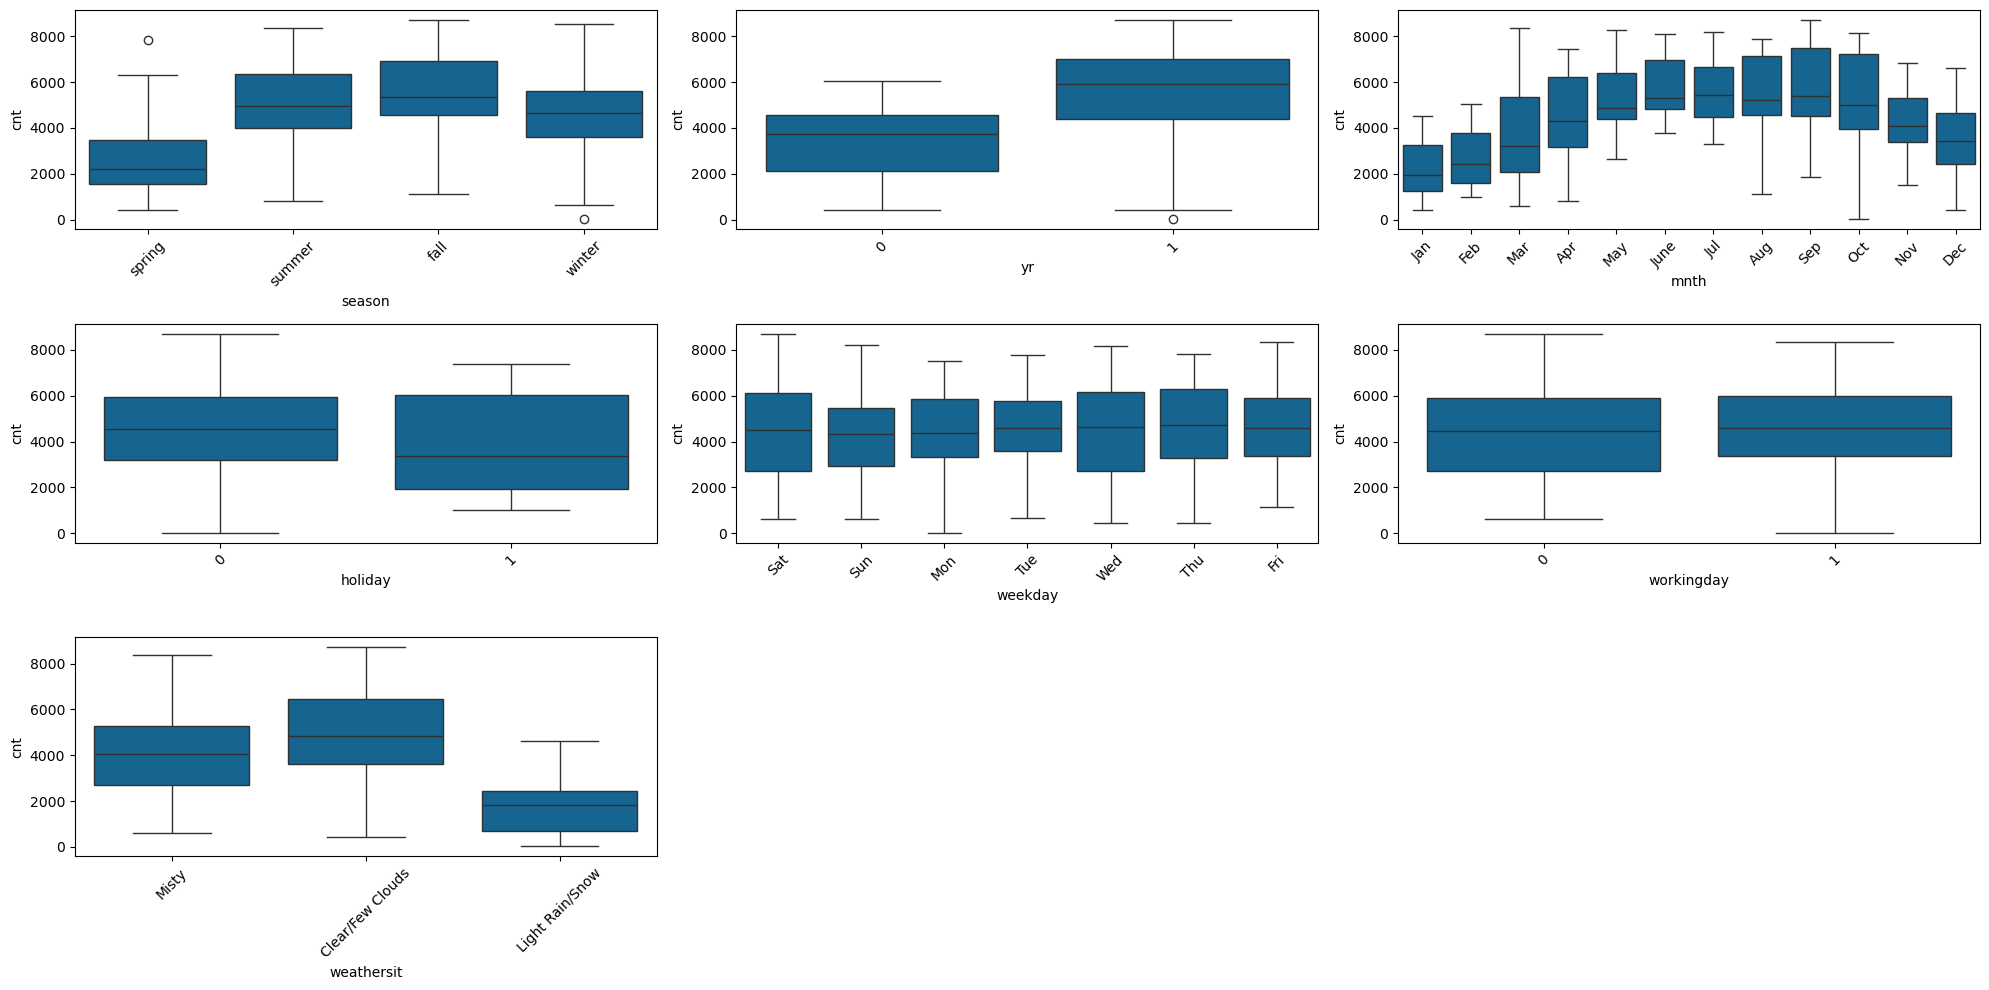

In [25]:
# Plotting Box Plots for each categorical column to check their variation with cnt
plt.figure(figsize = (20, 10))

fignum = 0
for col in non_num_data_cols[0:-1]:
    fignum = fignum + 1
    plt.subplot(3, 3, fignum)
    sns.boxplot(data = non_numeric_data, x = col, y='cnt')
    plt.xticks(rotation = 45)


plt.tight_layout()
plt.show()

**Observation(s):**

1. season and month show a good variation trend with demand across year, it could be a great feature for our ml model
2. weathersit also affects the demand for bikes
3. weekday shows variation in iqr with almost constant median across week
4. holidays shows wider demand range compared to working days

In [26]:
# Plotting cnt variation of workingday with weekday (old mapping)
# sns.barplot(data = non_numeric_data, x = 'weekday', y='cnt', hue='workingday')
# plt.xticks(rotation = 45)
# plt.show()

Note: As per above observation where it is showing non working day on Mon and Tue, we need to change the mapping of weekdays to 0 as Sun, 1 as Mon and so on.

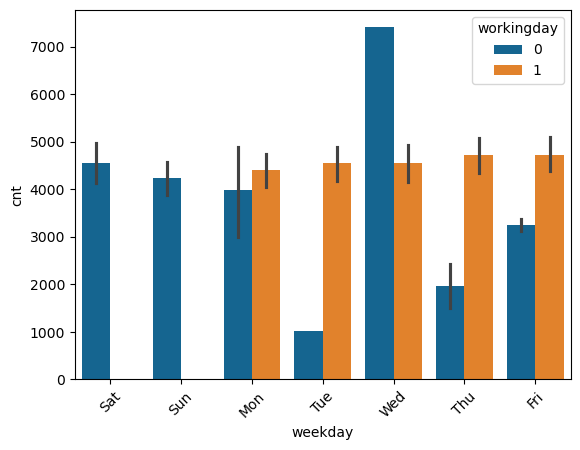

In [27]:
# Plotting cnt variation of workingday with weekday (new mapping)
sns.barplot(data = non_numeric_data, x = 'weekday', y='cnt', hue='workingday')
plt.xticks(rotation = 45)
plt.show()

**Observation(s):**

1. Workingdays show higher demands compared to non working days
2. Demand on working days remains almost constants irrespective of day
3. If its a wednesday and a non working day the demand is surprisingly high

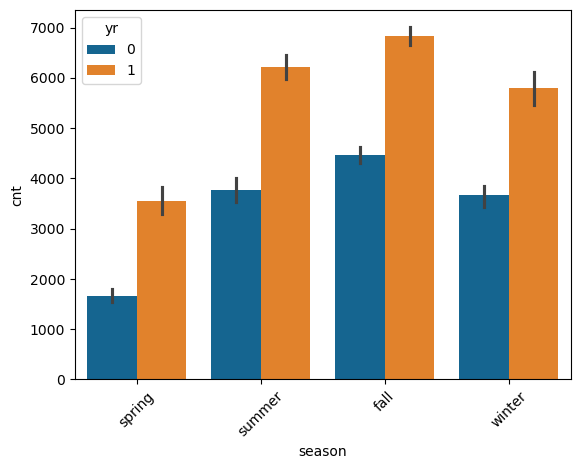

In [28]:
# Plotting cnt variation of season with yr (new mapping)
sns.barplot(data = non_numeric_data, x = 'season', y='cnt', hue='yr')
plt.xticks(rotation = 45)
plt.show()

**Observation(s):**

1. year 2019 shows significant improvement in demand over 2018 across all seasons
2. demand is usually highest in fall

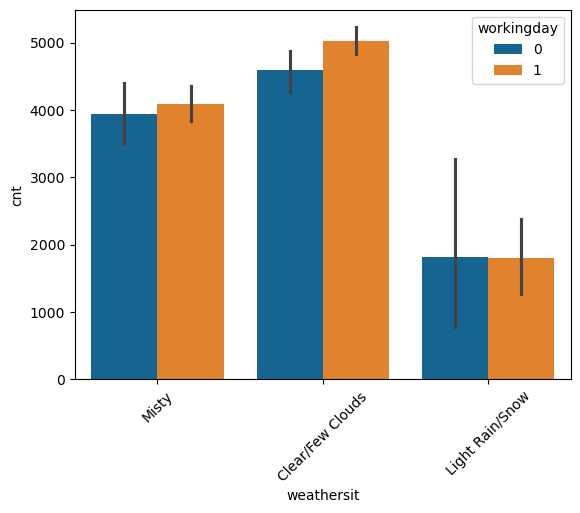

In [29]:
# Plotting cnt variation of weathersit with workingday (new mapping)
sns.barplot(data = non_numeric_data, x = 'weathersit', y='cnt', hue='workingday')
plt.xticks(rotation = 45)
plt.show()

**Observation(s):**

1. Rain or snow brings down the demand for bike sharing
2. Demand changes with weather irrespective of working or non working day

### EDA Summary:

1. temperature and actual temp could be important feature for our model
2. But temp and atemp are highly correlated with each other hence we can use any one of them
3. Humidity and windspeed appear to be less affecting on demand
4. season, month, year and weather situation appear to be affecting the demand for bike sharing hence could be important for our ml model
5. If its a holiday, tuesdays show lowest demand and wednesdays show highest demands

## Data Pre-Processing

**Note:** Based on EDA, I am dropping `atemp` column rightaway due to its high positive correlation with `temp` column. Since using highly correlated features is like giving the same information repeatedly to model in just a scaled manner. 

In [30]:
# Dropping atemp due to its high correlation with temp
# Since using highly correlated features is like giving the same information repeatedly to model in just a scaled manner 
data_df.drop('atemp', axis=1, inplace=True)

In [31]:
data_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Misty,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Misty,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear/Few Clouds,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear/Few Clouds,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear/Few Clouds,9.305237,43.6957,12.522300,1600


### Encoding Categorical Variables

Note: I have not dropped first value in pd.get_dummies since we need to interpret the important features to business.

In [32]:
# Since variables yr, holiday, workingday have values as 0 and 1 we can use them as it is
# Hence can be converted back into integer
cols_to_int = ['yr', 'holiday', 'workingday']
for col in cols_to_int:
    data_df[col] = data_df[col].astype('int32')

# Check changed dtypes
data_df.dtypes

season         object
yr              int32
mnth           object
holiday         int32
weekday        object
workingday      int32
weathersit     object
temp          float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [33]:
# We can onde hot encode categorical varibles season, mnth, weekday, weathersit using pd.get_dummies

# Encoding season
season_df = pd.get_dummies(data_df['season'], drop_first=True, dtype='int') 
data_df.drop('season', axis=1, inplace=True)
data_df = pd.concat([data_df, season_df], axis=1)
data_df.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter
0,0,Jan,0,Sat,0,Misty,14.110847,80.5833,10.749882,985,1,0,0
1,0,Jan,0,Sun,0,Misty,14.902598,69.6087,16.652113,801,1,0,0
2,0,Jan,0,Mon,1,Clear/Few Clouds,8.050924,43.7273,16.636703,1349,1,0,0
3,0,Jan,0,Tue,1,Clear/Few Clouds,8.200000,59.0435,10.739832,1562,1,0,0
4,0,Jan,0,Wed,1,Clear/Few Clouds,9.305237,43.6957,12.522300,1600,1,0,0


In [34]:
# Encoding mnth
mnth_df = pd.get_dummies(data_df['mnth'], drop_first=True, dtype='int') 
data_df.drop('mnth', axis=1, inplace=True)
data_df = pd.concat([data_df, mnth_df], axis=1)
data_df.head()

,yr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,...,Dec,Feb,Jan,Jul,June,Mar,May,Nov,Oct,Sep
0,0,0,Sat,0,Misty,14.110847,80.5833,10.749882,985,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,Sun,0,Misty,14.902598,69.6087,16.652113,801,1,...,0,0,1,0,0,0,0,0,0,0
2,0,0,Mon,1,Clear/Few Clouds,8.050924,43.7273,16.636703,1349,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,Tue,1,Clear/Few Clouds,8.200000,59.0435,10.739832,1562,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,Wed,1,Clear/Few Clouds,9.305237,43.6957,12.522300,1600,1,...,0,0,1,0,0,0,0,0,0,0


In [35]:
# Encoding weekday
weekday_df = pd.get_dummies(data_df['weekday'], drop_first=True, dtype='int') 
data_df.drop('weekday', axis=1, inplace=True)
data_df = pd.concat([data_df, weekday_df], axis=1)
data_df.head()

,yr,holiday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,0,0,0,Misty,14.110847,80.5833,10.749882,985,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,Misty,14.902598,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,Clear/Few Clouds,8.050924,43.7273,16.636703,1349,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,Clear/Few Clouds,8.200000,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,Clear/Few Clouds,9.305237,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,1


In [36]:
# Encoding weathersit
weathersit_df = pd.get_dummies(data_df['weathersit'], drop_first=True, dtype='int') 
data_df.drop('weathersit', axis=1, inplace=True)
data_df = pd.concat([data_df, weathersit_df], axis=1)
data_df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Rain/Snow,Misty
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [37]:
data_df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Rain/Snow,Misty
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


### Train Test Split

In [38]:
print(f"Original data shape: {data_df.shape}")
train_df, test_df = train_test_split(data_df, test_size=0.25, random_state=100)
print(f"train_df shape: {train_df.shape}")
print(f"test_df shape: {test_df.shape}")

Original data shape: (730, 29)
train_df shape: (547, 29)
test_df shape: (183, 29)


### Rescaling numerical variables

In [39]:
# Normalize numerical variables using minmax scaler
num_data_cols = ['temp', 'hum', 'windspeed', 'cnt']

normalizer = MinMaxScaler()
train_df[num_data_cols] = normalizer.fit_transform(train_df[num_data_cols])

# Check normalized results
train_df.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Rain/Snow,Misty
count,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,...,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000
mean,0.508227,0.027422,0.669104,0.535543,0.650673,0.319317,0.511382,0.257770,0.244973,0.244973,...,0.087751,0.080439,0.153565,0.151737,0.151737,0.131627,0.135283,0.151737,0.027422,0.349177
std,0.500390,0.163460,0.470966,0.225446,0.144515,0.169239,0.225008,0.437807,0.430465,0.430465,...,0.283192,0.272220,0.360861,0.359094,0.359094,0.338394,0.342339,0.359094,0.163460,0.477146
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.336998,0.538858,0.197844,0.350437,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.535847,0.655216,0.294101,0.514266,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.753113,0.413761,0.682697,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
# Normalizing test data
test_df[num_data_cols] = normalizer.transform(test_df[num_data_cols])
# Check normalized results
test_df.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Rain/Snow,Misty
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,...,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,0.475410,0.032787,0.726776,0.568688,0.635166,0.316439,0.530233,0.213115,0.273224,0.240437,...,0.076503,0.087432,0.114754,0.120219,0.120219,0.174863,0.163934,0.109290,0.032787,0.300546
std,0.500765,0.178567,0.446837,0.234887,0.152926,0.159371,0.215783,0.410632,0.446837,0.428521,...,0.266530,0.283242,0.319599,0.326109,0.326109,0.380892,0.371232,0.312858,0.178567,0.459754
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.362754,0.522601,0.199183,0.393293,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.575304,0.618721,0.303464,0.533134,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.774153,0.735079,0.404383,0.681086,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Separating independant and target variables

In [41]:
# X,y separation for train data
y_train = train_df['cnt']
X_train = train_df.drop('cnt', axis=1)

# X,y separation for test data
y_test = test_df['cnt']
X_test = test_df.drop('cnt', axis=1)

# Verifying shapes
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (547, 28)
y_train shape: (547,)
X_test shape: (183, 28)
y_test shape: (183,)


## Model Building and Evaluation

**Model Building Approach:**

Since our model has 32 features, which is fairly high, we will use following steps 
1. we will first use sklearns Recurssive Feature Elimination to get 15 most important features.
2. we will manually drop least important features one by one to get best performing model using statsmodel

### RFE using Scikit-learn

In [42]:
# Initialize multiple LR model and train
mlr = LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression()

In [43]:
# Run RFE
best_n_features = 15
selector = RFE(mlr, n_features_to_select=best_n_features)
selector = selector.fit(X_train, y_train)

In [44]:
# Printing rfe results
rfe_df = pd.DataFrame({'column':X_train.columns, 'support': selector.support_, 'ranking': selector.ranking_}).sort_values(by='ranking')
rfe_df


,column,support,ranking
0,yr,True,1
21,Sat,True,1
19,Sep,True,1
17,Nov,True,1
26,Light Rain/Snow,True,1
8,winter,True,1
7,summer,True,1
13,Jul,True,1
5,windspeed,True,1
1,holiday,True,1


In [45]:
# Getting list of importantv columns given by rfe
rfe_cols = X_train.columns[selector.support_]
rfe_cols

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Jul', 'Nov', 'Sep', 'Sat', 'Light Rain/Snow',
       'Misty'],
      dtype='object')

In [46]:
# Getting list of less important columns given by rfe
non_rfe_cols = X_train.columns[~selector.support_]
non_rfe_cols

Index(['Aug', 'Dec', 'Feb', 'Jan', 'June', 'Mar', 'May', 'Oct', 'Mon', 'Sun',
       'Thu', 'Tue', 'Wed'],
      dtype='object')

Filter X_train and X_test using RFE results

In [47]:
# selecting only rfe cols for X_train and X_test
X_train_rfe = X_train[rfe_cols]
X_test_rfe = X_test[rfe_cols]

# Verify shapes
print(f"X_train_rfe shape: {X_train_rfe.shape}")
print(f"X_test_rfe shape: {X_test_rfe.shape}")

X_train_rfe shape: (547, 15)
X_test_rfe shape: (183, 15)


### Manual Feature Selection using StatsModels Api

Training statsmodel MLR Model with top 15 features given by RFE

In [48]:
# Adding constant variable in train data
X_train_lm = sm.add_constant(X_train_rfe)

In [49]:
# Training Model
lm = sm.OLS(y_train, X_train_lm)
lm = lm.fit()

# Model Summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     202.2
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          3.32e-208
Time:                        20:33:24   Log-Likelihood:                 561.02
No. Observations:                 547   AIC:                            -1090.
Df Residuals:                     531   BIC:                            -1021.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2457      0.035      7.113      0.000       0.178       0.314
yr                  0.2279      0.008     29.764      0.000       0.213       0.243
holiday            -0.0715      0.025     -2.858      0.004      -0.121      -0.022
workingday          0.0444      0.011      4.128      0.000       0.023       0.066
temp                0.5243      0.032     16.481      0.000       0.462       0.587
hum                -0.1647      0.036     -4.573      0.000      -0.235      -0.094
windspeed          -0.1752      0.024     -7.230      0.000      -0.223      -0.128
spring             -0.0638      0.020     -3.227      0.001      -0.103      -0.025
summer              0.0511      0.014      3.600      0.000       0.023       0.079
winter              0.1089      0.016      6.604      0.000       0.076       0.141
Jul                -0.0564      0.018     -3.173      0.002      -0.091      -0.021
Nov                -0.0254      0.017     -1.529      0.127      -0.058       0.007
Sep                 0.0775      0.016      4.873      0.000       0.046       0.109
Sat                 0.0528      0.014      3.842      0.000       0.026       0.080
Light Rain/Snow    -0.2481      0.026     -9.672      0.000      -0.298      -0.198
Misty              -0.0565      0.010     -5.688      0.000      -0.076      -0.037
==============================================================================
Omnibus:                       71.323   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.114
Skew:                          -0.675   Prob(JB):                     2.10e-39
Kurtosis:                       5.448   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
# Get VIF
vif = pd.DataFrame()
X = X_train_lm.drop('const', axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,28.35
3,temp,16.66
2,workingday,5.08
5,windspeed,4.69
6,spring,4.37
8,winter,3.70
7,summer,2.80
14,Misty,2.29
0,yr,2.08
12,Sat,1.91


**Dropping `hum` column beacause of its VIF > 5 in VIF results**

We can observe that holiday has p-value pf 0.071 and VIF for humidity is more than 5 hence we can drop humidity and check model summary 

In [51]:
X_train_new = X_train_rfe.drop('hum', axis=1)

In [52]:
X_train_lm = sm.add_constant(X_train_new)
lr2 = sm.OLS(y_train, X_train_lm).fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     207.4
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          6.15e-205
Time:                        20:33:24   Log-Likelihood:                 550.46
No. Observations:                 547   AIC:                            -1071.
Df Residuals:                     532   BIC:                            -1006.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1589      0.029      5.406      0.000       0.101       0.217
yr                  0.2321      0.008     29.986      0.000       0.217       0.247
holiday            -0.0697      0.025     -2.738      0.006      -0.120      -0.020
workingday          0.0468      0.011      4.271      0.000       0.025       0.068
temp                0.4911      0.032     15.566      0.000       0.429       0.553
windspeed          -0.1439      0.024     -6.078      0.000      -0.190      -0.097
spring             -0.0717      0.020     -3.579      0.000      -0.111      -0.032
summer              0.0467      0.014      3.240      0.001       0.018       0.075
winter              0.0952      0.017      5.767      0.000       0.063       0.128
Jul                -0.0511      0.018     -2.832      0.005      -0.087      -0.016
Nov                -0.0235      0.017     -1.390      0.165      -0.057       0.010
Sep                 0.0718      0.016      4.448      0.000       0.040       0.104
Sat                 0.0569      0.014      4.068      0.000       0.029       0.084
Light Rain/Snow    -0.2933      0.024    -12.169      0.000      -0.341      -0.246
Misty              -0.0828      0.008    -10.060      0.000      -0.099      -0.067
==============================================================================
Omnibus:                       73.305   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.624
Skew:                          -0.691   Prob(JB):                     1.34e-40
Kurtosis:                       5.479   Cond. No.                         19.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
# Get VIF
vif = pd.DataFrame()
X = X_train_lm.drop('const', axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,6.80
2,workingday,5.01
4,windspeed,4.64
5,spring,2.50
7,winter,2.44
6,summer,2.33
0,yr,2.07
11,Sat,1.90
13,Misty,1.59
8,Jul,1.56


**Dropping `Nov` column beacause of its p-value > 0.05 in model summary**

Nov column's p-value increased to 0.165 where VIF for temp is little higher than 5. We can drop Nov col and analyze model further

In [54]:
X_train_new = X_train_rfe.drop(['hum', 'Nov'], axis=1)

In [55]:
X_train_lm = sm.add_constant(X_train_new)
lr3 = sm.OLS(y_train, X_train_lm).fit()

lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     222.9
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          1.05e-205
Time:                        20:33:24   Log-Likelihood:                 549.46
No. Observations:                 547   AIC:                            -1071.
Df Residuals:                     533   BIC:                            -1011.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1526      0.029      5.250      0.000       0.095       0.210
yr                  0.2322      0.008     29.976      0.000       0.217       0.247
holiday            -0.0734      0.025     -2.896      0.004      -0.123      -0.024
workingday          0.0467      0.011      4.261      0.000       0.025       0.068
temp                0.4984      0.031     16.010      0.000       0.437       0.560
windspeed          -0.1456      0.024     -6.153      0.000      -0.192      -0.099
spring             -0.0671      0.020     -3.392      0.001      -0.106      -0.028
summer              0.0490      0.014      3.415      0.001       0.021       0.077
winter              0.0904      0.016      5.595      0.000       0.059       0.122
Jul                -0.0509      0.018     -2.817      0.005      -0.086      -0.015
Sep                 0.0743      0.016      4.628      0.000       0.043       0.106
Sat                 0.0573      0.014      4.093      0.000       0.030       0.085
Light Rain/Snow    -0.2918      0.024    -12.108      0.000      -0.339      -0.244
Misty              -0.0823      0.008     -9.997      0.000      -0.098      -0.066
==============================================================================
Omnibus:                       71.146   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              173.174
Skew:                          -0.681   Prob(JB):                     2.49e-38
Kurtosis:                       5.396   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
# Get VIF
vif = pd.DataFrame()
X = X_train_lm.drop('const', axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,6.77
2,workingday,4.99
4,windspeed,4.60
5,spring,2.49
6,summer,2.32
0,yr,2.07
7,winter,1.97
10,Sat,1.90
12,Misty,1.58
8,Jul,1.56


**Dropping `workingday` feature due to VIF close to 5**

As we can observe, all the features appear to be significant due to lower p-value in model summary while VIF for temp is 6.77 a little higher than 5. Since in EDA we found a good correlation of temp with cnt we will not drop the temp column.

Intstead we will drop `workingday` feature who has VID 4.99 i.e. close to 5

In [57]:
X_train_new = X_train_rfe.drop(['hum', 'Nov', 'workingday'], axis=1)

In [58]:
X_train_lm = sm.add_constant(X_train_new)
lr3 = sm.OLS(y_train, X_train_lm).fit()

lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     232.4
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          4.93e-203
Time:                        20:33:24   Log-Likelihood:                 540.30
No. Observations:                 547   AIC:                            -1055.
Df Residuals:                     534   BIC:                            -998.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1888      0.028      6.687      0.000       0.133       0.244
yr                  0.2330      0.008     29.621      0.000       0.218       0.248
holiday            -0.1109      0.024     -4.591      0.000      -0.158      -0.063
temp                0.5006      0.032     15.831      0.000       0.438       0.563
windspeed          -0.1443      0.024     -6.001      0.000      -0.192      -0.097
spring             -0.0685      0.020     -3.408      0.001      -0.108      -0.029
summer              0.0481      0.015      3.306      0.001       0.020       0.077
winter              0.0889      0.016      5.416      0.000       0.057       0.121
Jul                -0.0533      0.018     -2.904      0.004      -0.089      -0.017
Sep                 0.0746      0.016      4.572      0.000       0.043       0.107
Sat                 0.0192      0.011      1.755      0.080      -0.002       0.041
Light Rain/Snow    -0.2869      0.024    -11.729      0.000      -0.335      -0.239
Misty              -0.0802      0.008     -9.605      0.000      -0.097      -0.064
==============================================================================
Omnibus:                       70.188   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.044
Skew:                          -0.709   Prob(JB):                     5.85e-34
Kurtosis:                       5.169   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
# Get VIF
vif = pd.DataFrame()
X = X_train_lm.drop('const', axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.12
3,windspeed,4.55
5,summer,2.24
4,spring,2.13
0,yr,2.06
6,winter,1.79
11,Misty,1.57
7,Jul,1.56
8,Sep,1.35
9,Sat,1.19


**Dropping `windspeed` feature due to VIF close to 5**

As we can observe, all the features appear to be significant due to lower p-value in model summary while VIF for temp is 5.12 a little higher than 5. Since in EDA we found a good correlation of temp with cnt we will not drop the temp column.

Intstead we will drop `windspeed` feature who has VIF 4.55 i.e. close to 5

In [60]:
X_train_new = X_train_rfe.drop(['hum', 'Nov', 'workingday', 'windspeed'], axis=1)

In [61]:
X_train_lm = sm.add_constant(X_train_new)
lr3 = sm.OLS(y_train, X_train_lm).fit()

lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     234.9
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          1.09e-196
Time:                        20:33:24   Log-Likelihood:                 522.45
No. Observations:                 547   AIC:                            -1021.
Df Residuals:                     535   BIC:                            -969.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1401      0.028      5.020      0.000       0.085       0.195
yr                  0.2319      0.008     28.570      0.000       0.216       0.248
holiday            -0.1158      0.025     -4.647      0.000      -0.165      -0.067
temp                0.5129      0.033     15.747      0.000       0.449       0.577
spring             -0.0755      0.021     -3.647      0.000      -0.116      -0.035
summer              0.0401      0.015      2.679      0.008       0.011       0.070
winter              0.0915      0.017      5.407      0.000       0.058       0.125
Jul                -0.0529      0.019     -2.792      0.005      -0.090      -0.016
Sep                 0.0790      0.017      4.697      0.000       0.046       0.112
Sat                 0.0155      0.011      1.374      0.170      -0.007       0.038
Light Rain/Snow    -0.3017      0.025    -12.011      0.000      -0.351      -0.252
Misty              -0.0790      0.009     -9.174      0.000      -0.096      -0.062
==============================================================================
Omnibus:                       76.132   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.179
Skew:                          -0.728   Prob(JB):                     1.01e-40
Kurtosis:                       5.441   Cond. No.                         16.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
# Get VIF
vif = pd.DataFrame()
X = X_train_lm.drop('const', axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.28
0,yr,2.06
4,summer,1.99
5,winter,1.62
10,Misty,1.57
6,Jul,1.56
3,spring,1.48
7,Sep,1.35
8,Sat,1.18
9,Light Rain/Snow,1.06


**Dropping `Sat` feature due to p-value greater than 0.05**

As we can observe, all the features have VIF less than 5 but p-value for Sat increased to 0.17

We will drop `Sat` feature and analyze model further

In [63]:
X_train_new = X_train_rfe.drop(['hum', 'Nov', 'workingday', 'windspeed', 'Sat'], axis=1)

In [64]:
X_train_lm = sm.add_constant(X_train_new)
lr3 = sm.OLS(y_train, X_train_lm).fit()

lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     257.8
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          1.69e-197
Time:                        20:33:24   Log-Likelihood:                 521.49
No. Observations:                 547   AIC:                            -1021.
Df Residuals:                     536   BIC:                            -973.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1436      0.028      5.162      0.000       0.089       0.198
yr                  0.2318      0.008     28.528      0.000       0.216       0.248
holiday            -0.1184      0.025     -4.759      0.000      -0.167      -0.070
temp                0.5112      0.033     15.693      0.000       0.447       0.575
spring             -0.0758      0.021     -3.658      0.000      -0.117      -0.035
summer              0.0398      0.015      2.654      0.008       0.010       0.069
winter              0.0914      0.017      5.397      0.000       0.058       0.125
Jul                -0.0525      0.019     -2.769      0.006      -0.090      -0.015
Sep                 0.0793      0.017      4.712      0.000       0.046       0.112
Light Rain/Snow    -0.3011      0.025    -11.980      0.000      -0.350      -0.252
Misty              -0.0789      0.009     -9.155      0.000      -0.096      -0.062
==============================================================================
Omnibus:                       70.708   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.509
Skew:                          -0.673   Prob(JB):                     1.28e-38
Kurtosis:                       5.418   Cond. No.                         16.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
# Get VIF
vif = pd.DataFrame()
X = X_train_lm.drop('const', axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.23
0,yr,2.06
4,summer,1.98
5,winter,1.60
9,Misty,1.57
6,Jul,1.56
3,spring,1.44
7,Sep,1.35
8,Light Rain/Snow,1.06
1,holiday,1.04


**Observation(s):**


Now all the features have VIF less than and 5 and p-values less than 0.05 which indicates all the features have minimal multicollinearity and are statistically significant for current Regression model.

We will consider this as final model and do further residual analysis on this model only.

## Residual Analysis on Best Model

In [66]:
X_train_lm.columns

Index(['const', 'yr', 'holiday', 'temp', 'spring', 'summer', 'winter', 'Jul',
       'Sep', 'Light Rain/Snow', 'Misty'],
      dtype='object')

In [67]:
# Train best model
best_model_features = ['yr', 'holiday', 'temp', 'spring', 'summer', 'winter', 'Jul',
       'Sep', 'Light Rain/Snow', 'Misty']

# Filter best features from X_train and X_test
X_train_best = X_train[best_model_features]
X_test_best = X_test[best_model_features]

# Best Model
X_train_best = sm.add_constant(X_train_best)
best_mlr = sm.OLS(y_train, X_train_best).fit()
best_mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     257.8
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          1.69e-197
Time:                        20:33:24   Log-Likelihood:                 521.49
No. Observations:                 547   AIC:                            -1021.
Df Residuals:                     536   BIC:                            -973.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1436      0.028      5.162      0.000       0.089       0.198
yr                  0.2318      0.008     28.528      0.000       0.216       0.248
holiday            -0.1184      0.025     -4.759      0.000      -0.167      -0.070
temp                0.5112      0.033     15.693      0.000       0.447       0.575
spring             -0.0758      0.021     -3.658      0.000      -0.117      -0.035
summer              0.0398      0.015      2.654      0.008       0.010       0.069
winter              0.0914      0.017      5.397      0.000       0.058       0.125
Jul                -0.0525      0.019     -2.769      0.006      -0.090      -0.015
Sep                 0.0793      0.017      4.712      0.000       0.046       0.112
Light Rain/Snow    -0.3011      0.025    -11.980      0.000      -0.350      -0.252
Misty              -0.0789      0.009     -9.155      0.000      -0.096      -0.062
==============================================================================
Omnibus:                       70.708   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.509
Skew:                          -0.673   Prob(JB):                     1.28e-38
Kurtosis:                       5.418   Cond. No.                         16.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Plotting histogram for error and check error distribution on train data

Text(0.5, 0, 'Errors')

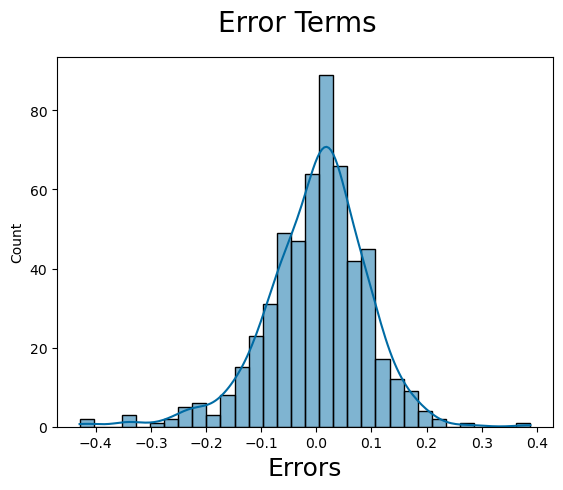

In [68]:
# Predictions on train data
y_train_pred = best_mlr.predict(X_train_best)


# Plot the histogram of the error terms
fig = plt.figure()
sns.histplot((y_train - y_train_pred), kde=True)
fig.suptitle('Error Terms', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 18)

**Observation(s):**

1. As we can observe the histogram for error is Normally Distributed with a longer tail on left side, which fulfils assumption of linear regression

In [69]:
# Computing r-square metric
r2_train = r2_score(y_train, y_train_pred)
print(f"R-Square Metric for Train Data: {round(r2_train, 2)}")

# Computing adjusted r2 on test data
n = X_train_best.shape[0]
p = X_train_best.shape[1]
adjusted_r2_train = 1 - (1 - r2_train) * (n - 1) / (n - p - 1)
print(f"Adjusted R-Square Metric for Train Data: {round(adjusted_r2_train, 2)}")

# Compute RMSE on train for best model
mse_train = mean_squared_error(y_train, y_train_pred)
print(f"MSE for Train Data: {round(mse_train, 2)}")

R-Square Metric for Train Data: 0.83
Adjusted R-Square Metric for Train Data: 0.82
MSE for Train Data: 0.01


### Best Model Evaluation on Test Data

We will get predictions on test data and also plot the actual vs predicted values for test data to analyze best model performance on test data.

In [70]:
# Getting Predictions for test data
X_test_best = sm.add_constant(X_test_best)
y_test_pred = best_mlr.predict(X_test_best)

In [71]:
# Computing Metrics

# Computing r-square metric
r2_test = r2_score(y_test, y_test_pred)
print(f"R-Square Metric for Test Data: {round(r2_test, 2)}")

# Computing adjusted r2 on test data
n = X_test_best.shape[0]
p = X_test_best.shape[1]
adjusted_r2_test = 1 - (1 - r2_test) * (n - 1) / (n - p - 1)
print(f"Adjusted R-Square Metric for Test Data: {round(adjusted_r2_test, 2)}")

# Compute RMSE on test for best model
mse_test = mean_squared_error(y_test, y_test_pred)
print(f"MSE for Test Data: {round(mse_test, 2)}")

R-Square Metric for Test Data: 0.79
Adjusted R-Square Metric for Test Data: 0.78
MSE for Test Data: 0.01


Text(0, 0.5, 'y_pred')

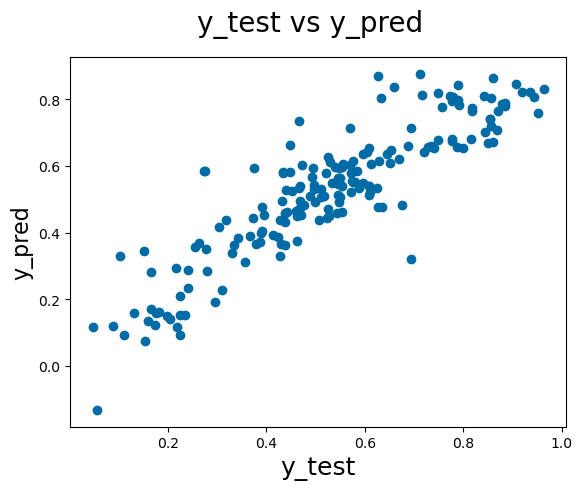

In [72]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

## Best Model Metrics Summary

In [73]:
# Prettytable Summarization
print("Best Model Performance Stats")
table = PrettyTable()

table.field_names = ["Data Type", "Size", "No of features", "R-Square", "Adjusted R-Sqaured", "MSE"]
table.add_rows(
    [
        ["Train", "547 rows", 10, 0.83, 0.82, 0.01],
        ["Test", "183 rows", 10, 0.79, 0.78, 0.01],
    ]
)
print(table)





Best Model Performance Stats
+-----------+----------+----------------+----------+--------------------+------+
| Data Type |   Size   | No of features | R-Square | Adjusted R-Sqaured | MSE  |
+-----------+----------+----------------+----------+--------------------+------+
|   Train   | 547 rows |       10       |   0.83   |        0.82        | 0.01 |
|    Test   | 183 rows |       10       |   0.79   |        0.78        | 0.01 |
+-----------+----------+----------------+----------+--------------------+------+


## Conclusion

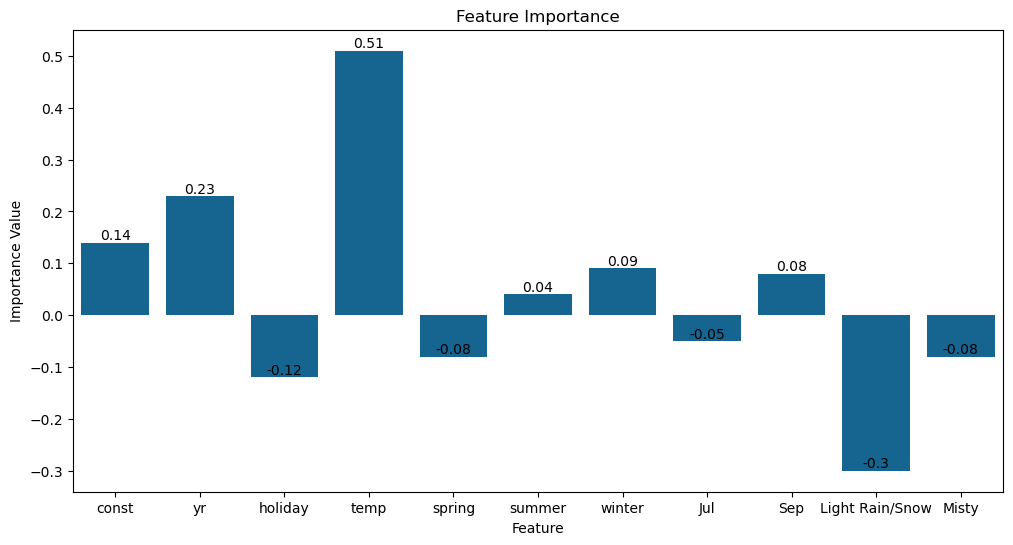

In [74]:
# Plotting feature Importance Plot
features_list = list(X_train_best.columns)
importance_list = best_mlr.params.round(2).to_list()

feature_importance_data = {
    'Feature': features_list,
    'Importance Value': importance_list
}
df = pd.DataFrame(feature_importance_data)

# Create a barplot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='Feature', y='Importance Value', data=feature_importance_data)

# Annotate each bar
for p in barplot.patches:
    barplot.annotate(f'{p.get_height()}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom')

plt.title('Feature Importance')

# Show the plot
plt.show()

From above Multiple Linear Regression Model Analysis we can conclude that

1. Building Multiple Linear Regression is possible on given data
2. We found 10 most important parameters that affect bike sharing demand
3. Feature importance are as plotted above. Temperature and weather status appear to affect the demand the most as per our best model.
4. We achieved best Model using statsmodels OLS with R-Square metric of 0.79 on test data and 0.83 on train data
5. Same model can be used to predict demand in future

Future Predicted Demand = 0.14 + 0.23 * (year) - 0.12 * (holiday) + 0.51 * (temperature) - 0.08 * (spring) + 0.04 * (summer) + 0.09 * (winter) - 0.05 * (July) + 0.08 * (Sep) - 0.3 * (Light Rain/Snow) - 0.08 * (Misty Weather)